/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single r

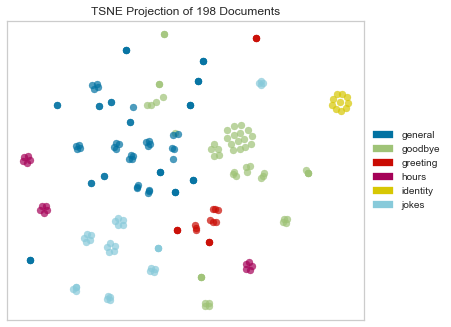

<AxesSubplot:title={'center':'TSNE Projection of 198 Documents'}>

In [5]:
from sklearn.manifold import TSNE
import json
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.text import TSNEVisualizer

# embedded data has fasttext vectors of the sentences
with open("/Users/aneripatel/Desktop/SEMESTER-6/30_AIML_Aneri/30_AIML_Aneri_Dataset/embedded_data_short.json") as file:
    data = json.load(file)

X = []

for intent in data['intents']:

    for pattern in intent['patterns']:
        if not (intent['tag'] == 'general'):
            pattern = np.array(pattern)
            X.append(pattern)


clusters = KMeans(n_clusters=6)
clusters.fit(X)
mapping = {0:'greeting', 1:'general', 2:'jokes',3:'goodbye',4:'identity',5:'hours'}
clusters.labels_ = [mapping[i] for i in clusters.labels_]
tsne = TSNEVisualizer()
tsne.fit(X, ["{}".format(c) for c in clusters.labels_])
tsne.poof()